In [1]:
import numpy as np
import scipy.stats as stats

def z_test(sample_mean, pop_mean, pop_std, sample_size):
    z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    return z_score, p_value

np.random.seed(42)
pop_mean = 100
pop_std = 15
sample_size = 30
sample = np.random.normal(loc=105, scale=pop_std, size=sample_size)
sample_mean = np.mean(sample)

z_score, p_value = z_test(sample_mean, pop_mean, pop_std, sample_size)
print(f"Z-score: {z_score}, P-value: {p_value}")

Z-score: 0.7952188685286633, P-value: 0.42648619784131947


In [2]:
def one_sample_z_test(sample, pop_mean, pop_std):
    sample_mean = np.mean(sample)
    sample_size = len(sample)
    z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test
    return z_score, p_value

z_score, p_value = one_sample_z_test(sample, pop_mean, pop_std)
print(f"One-sample Z-test: Z-score: {z_score}, P-value: {p_value}")

One-sample Z-test: Z-score: 0.7952188685286633, P-value: 0.42648619784131947


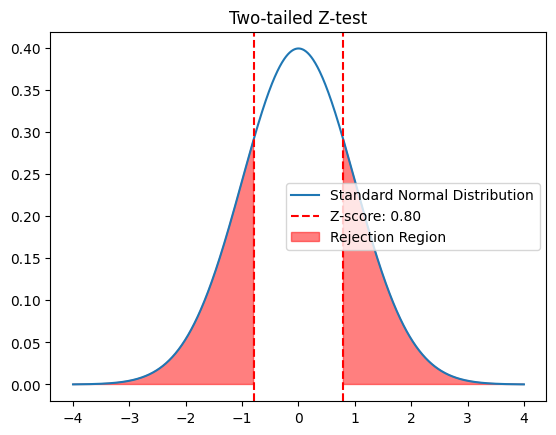

In [3]:
import matplotlib.pyplot as plt

def plot_z_test(z_score):
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)
    plt.plot(x, y, label="Standard Normal Distribution")
    plt.axvline(x=z_score, color='r', linestyle='--', label=f'Z-score: {z_score:.2f}')
    plt.axvline(x=-z_score, color='r', linestyle='--')
    plt.fill_between(x, y, where=(x >= abs(z_score)) | (x <= -abs(z_score)), color='red', alpha=0.5, label="Rejection Region")
    plt.legend()
    plt.title("Two-tailed Z-test")
    plt.show()

plot_z_test(z_score)

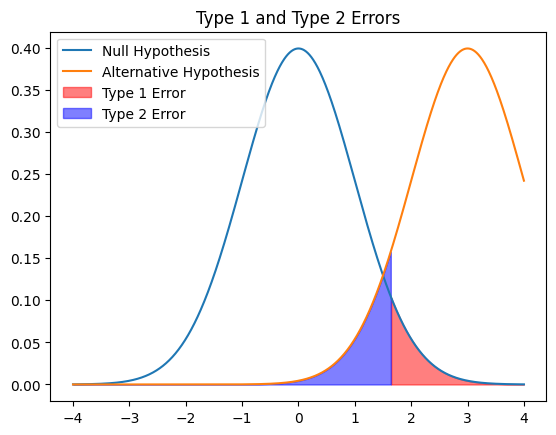

In [4]:
def type1_type2_error(alpha, beta):
    x = np.linspace(-4, 4, 1000)
    y_null = stats.norm.pdf(x, loc=0, scale=1)
    y_alt = stats.norm.pdf(x, loc=3, scale=1)

    plt.plot(x, y_null, label="Null Hypothesis")
    plt.plot(x, y_alt, label="Alternative Hypothesis")

    # Type 1 error (alpha)
    crit_val = stats.norm.ppf(1 - alpha)
    plt.fill_between(x, y_null, where=(x >= crit_val), color='red', alpha=0.5, label="Type 1 Error")

    # Type 2 error (beta)
    plt.fill_between(x, y_alt, where=(x <= crit_val), color='blue', alpha=0.5, label="Type 2 Error")

    plt.legend()
    plt.title("Type 1 and Type 2 Errors")
    plt.show()

type1_type2_error(alpha=0.05, beta=0.2)

In [5]:
def independent_t_test(sample1, sample2):
    t_stat, p_value = stats.ttest_ind(sample1, sample2)
    return t_stat, p_value

sample1 = np.random.normal(loc=100, scale=15, size=30)
sample2 = np.random.normal(loc=110, scale=15, size=30)
t_stat, p_value = independent_t_test(sample1, sample2)
print(f"Independent T-test: T-statistic: {t_stat}, P-value: {p_value}")

Independent T-test: T-statistic: -3.2235687926969296, P-value: 0.0020798228169390093


In [6]:
def paired_t_test(sample1, sample2):
    t_stat, p_value = stats.ttest_rel(sample1, sample2)
    return t_stat, p_value

sample1 = np.random.normal(loc=100, scale=15, size=30)
sample2 = sample1 + np.random.normal(loc=5, scale=5, size=30)
t_stat, p_value = paired_t_test(sample1, sample2)
print(f"Paired T-test: T-statistic: {t_stat}, P-value: {p_value}")

Paired T-test: T-statistic: -4.840178050982095, P-value: 3.954922469680362e-05


In [7]:
def compare_z_t_test(sample, pop_mean, pop_std):
    z_score, p_value_z = z_test(np.mean(sample), pop_mean, pop_std, len(sample))
    t_stat, p_value_t = stats.ttest_1samp(sample, pop_mean)
    return z_score, p_value_z, t_stat, p_value_t

z_score, p_value_z, t_stat, p_value_t = compare_z_t_test(sample, pop_mean, pop_std)
print(f"Z-test: Z-score: {z_score}, P-value: {p_value_z}")
print(f"T-test: T-statistic: {t_stat}, P-value: {p_value_t}")

Z-test: Z-score: 0.7952188685286633, P-value: 0.42648619784131947
T-test: T-statistic: 0.8835702105192909, P-value: 0.3841947958124131


In [8]:
def confidence_interval(sample, confidence_level=0.95):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_size = len(sample)
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=sample_size-1) * (sample_std / np.sqrt(sample_size))
    return sample_mean - margin_of_error, sample_mean + margin_of_error

ci_lower, ci_upper = confidence_interval(sample)
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")

Confidence Interval: (97.13677771552751, 107.21881540894132)


In [9]:
def margin_of_error(sample, confidence_level=0.95):
    sample_std = np.std(sample, ddof=1)
    sample_size = len(sample)
    critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size-1)
    return critical_value * (sample_std / np.sqrt(sample_size))

moe = margin_of_error(sample)
print(f"Margin of Error: {moe}")

Margin of Error: 5.041018846706905


In [10]:
def bayesian_inference(prior, likelihood, evidence):
    posterior = (prior * likelihood) / evidence
    return posterior

prior = 0.5
likelihood = 0.7
evidence = 0.65
posterior = bayesian_inference(prior, likelihood, evidence)
print(f"Posterior Probability: {posterior}")

Posterior Probability: 0.5384615384615384


In [11]:
def chi_square_test(observed):
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)
    return chi2_stat, p_value, expected

observed = np.array([[10, 20, 30], [20, 30, 40]])
chi2_stat, p_value, expected = chi_square_test(observed)
print(f"Chi-square Statistic: {chi2_stat}, P-value: {p_value}")
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 0.7936507936507936, P-value: 0.6724514275370008
Expected Frequencies:
 [[12. 20. 28.]
 [18. 30. 42.]]


In [12]:
def expected_frequencies(observed):
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    total = observed.sum()
    expected = np.outer(row_totals, col_totals) / total
    return expected

expected = expected_frequencies(observed)
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[12. 20. 28.]
 [18. 30. 42.]]


In [28]:
import numpy as np
from scipy import stats

def goodness_of_fit(observed, expected):
    chi2_stat, p_value = stats.chisquare(observed, expected)
    return chi2_stat, p_value

observed = np.array([10, 20, 30, 40])

expected = np.array([15, 15, 25, 35])
expected = expected * (observed.sum() / expected.sum())

chi2_stat, p_value = goodness_of_fit(observed, expected)

print(f"Goodness-of-fit Chi-square Statistic: {chi2_stat:.4f}, P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The observed distribution differs significantly from the expected distribution.")
else:
    print("Fail to reject the null hypothesis: No significant difference between observed and expected distributions.")


Goodness-of-fit Chi-square Statistic: 3.5429, P-value: 0.3152
Fail to reject the null hypothesis: No significant difference between observed and expected distributions.


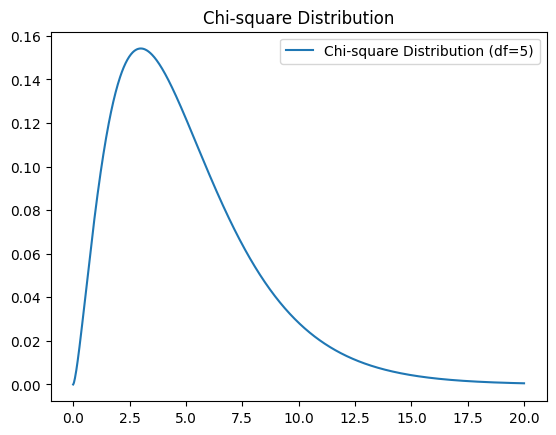

In [14]:
def plot_chi_square_distribution(df):
    x = np.linspace(0, 20, 1000)
    y = stats.chi2.pdf(x, df)
    plt.plot(x, y, label=f"Chi-square Distribution (df={df})")
    plt.title("Chi-square Distribution")
    plt.legend()
    plt.show()

plot_chi_square_distribution(df=5)

In [15]:
def f_test(sample1, sample2):
    f_stat = np.var(sample1, ddof=1) / np.var(sample2, ddof=1)
    df1 = len(sample1) - 1
    df2 = len(sample2) - 1
    p_value = 2 * min(stats.f.cdf(f_stat, df1, df2), 1 - stats.f.cdf(f_stat, df1, df2))
    return f_stat, p_value

sample1 = np.random.normal(loc=100, scale=15, size=30)
sample2 = np.random.normal(loc=100, scale=20, size=30)
f_stat, p_value = f_test(sample1, sample2)
print(f"F-test: F-statistic: {f_stat}, P-value: {p_value}")

F-test: F-statistic: 0.4554859899173131, P-value: 0.0381412069866613


In [16]:
def anova_test(*samples):
    f_stat, p_value = stats.f_oneway(*samples)
    return f_stat, p_value

sample1 = np.random.normal(loc=100, scale=15, size=30)
sample2 = np.random.normal(loc=110, scale=15, size=30)
sample3 = np.random.normal(loc=120, scale=15, size=30)
f_stat, p_value = anova_test(sample1, sample2, sample3)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

ANOVA F-statistic: 13.817319443270751, P-value: 6.149605611006295e-06


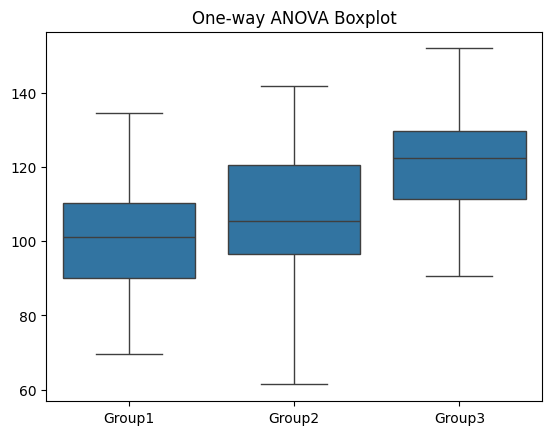

In [17]:
import seaborn as sns

def plot_anova_boxplot(*samples):
    data = np.concatenate(samples)
    labels = np.repeat(['Group1', 'Group2', 'Group3'], [len(s) for s in samples])
    sns.boxplot(x=labels, y=data)
    plt.title("One-way ANOVA Boxplot")
    plt.show()

plot_anova_boxplot(sample1, sample2, sample3)

In [18]:
def simulate_normal_data_hypothesis_testing():
    sample = np.random.normal(loc=105, scale=15, size=30)
    t_stat, p_value = stats.ttest_1samp(sample, popmean=100)
    return t_stat, p_value

t_stat, p_value = simulate_normal_data_hypothesis_testing()
print(f"Hypothesis Testing: T-statistic: {t_stat}, P-value: {p_value}")

Hypothesis Testing: T-statistic: 4.335215625738188, P-value: 0.0001599476773056114


In [19]:
def chi_square_variance_test(sample, pop_variance):
    sample_variance = np.var(sample, ddof=1)
    n = len(sample)
    chi2_stat = (n - 1) * sample_variance / pop_variance
    p_value = 2 * min(stats.chi2.cdf(chi2_stat, df=n-1), 1 - stats.chi2.cdf(chi2_stat, df=n-1))
    return chi2_stat, p_value

chi2_stat, p_value = chi_square_variance_test(sample, pop_variance=225)
print(f"Chi-square Variance Test: Chi2-statistic: {chi2_stat}, P-value: {p_value}")

Chi-square Variance Test: Chi2-statistic: 23.490335511603895, P-value: 0.4927181645162752


In [20]:
def z_test_proportions(p1, p2, n1, n2):
    pooled_p = (p1 * n1 + p2 * n2) / (n1 + n2)
    z_score = (p1 - p2) / np.sqrt(pooled_p * (1 - pooled_p) * (1/n1 + 1/n2))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    return z_score, p_value

p1, p2 = 0.5, 0.6
n1, n2 = 100, 100
z_score, p_value = z_test_proportions(p1, p2, n1, n2)
print(f"Z-test for Proportions: Z-score: {z_score}, P-value: {p_value}")

Z-test for Proportions: Z-score: -1.4213381090374024, P-value: 0.155218489684684


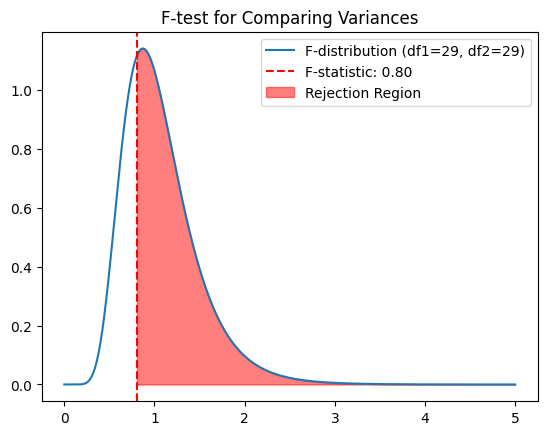

In [21]:
def plot_f_test(sample1, sample2):
    f_stat, p_value = f_test(sample1, sample2)
    df1 = len(sample1) - 1
    df2 = len(sample2) - 1
    x = np.linspace(0, 5, 1000)
    y = stats.f.pdf(x, df1, df2)
    plt.plot(x, y, label=f"F-distribution (df1={df1}, df2={df2})")
    plt.axvline(x=f_stat, color='r', linestyle='--', label=f'F-statistic: {f_stat:.2f}')
    plt.fill_between(x, y, where=(x >= f_stat), color='red', alpha=0.5, label="Rejection Region")
    plt.legend()
    plt.title("F-test for Comparing Variances")
    plt.show()

plot_f_test(sample1, sample2)

In [27]:
import numpy as np
import scipy.stats as stats

def chi_square_goodness_of_fit_simulated():
    # Simulate observed data
    observed = np.random.randint(10, 50, size=5)

    # Ensure the sum of observed and expected frequencies match
    total_observed = np.sum(observed)
    expected = np.array([total_observed / 5] * 5)  # Equal expected frequencies

    # Perform Chi-square goodness-of-fit test
    chi2_stat, p_value = stats.chisquare(observed, expected)
    return chi2_stat, p_value

chi2_stat, p_value = chi_square_goodness_of_fit_simulated()
print(f"Chi-square Goodness-of-fit: Chi2-statistic: {chi2_stat}, P-value: {p_value}")

Goodness-of-fit Chi-square Statistic: 3.5429, P-value: 0.3152
Fail to reject the null hypothesis: No significant difference between observed and expected distributions.
